# **TWIA LAB EXPERIMENT 8**
## **SUBMITTED BY: -**


##   **MAHIMA MUNJAL**
##   **17CSU098**





## Importing Libraries

In [ ]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7MB 5.3MB/s 
     |████████████████████████████████| 22.3MB 2.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn_extra.cluster import KMedoids
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import normalize

## Data

In [ ]:
categories = ['rec.motorcycles', 'sci.electronics', 'comp.graphics', 'sci.med']

# sklearn provides us with subset data for training and testing
train_data = fetch_20newsgroups(subset='train',
                                categories=categories, shuffle=True, random_state=42)

print(train_data.target_names)

print("\n".join(train_data.data[0].split("\n")[:3]))
print(train_data.target_names[train_data.target[0]])

# Let's look at categories of our first ten training data
for t in train_data.target[:10]:
    print(train_data.target_names[t])

['comp.graphics', 'rec.motorcycles', 'sci.electronics', 'sci.med']
From: kreyling@lds.loral.com (Ed Kreyling 6966)
Subject: Sun-os and 8bit ASCII graphics
Organization: Loral Data Systems
comp.graphics
comp.graphics
comp.graphics
rec.motorcycles
comp.graphics
sci.med
sci.electronics
sci.electronics
comp.graphics
rec.motorcycles
sci.electronics


## VECTORIZATION

In [ ]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data.data)

# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


## K-Means

In [ ]:
dataset = fetch_20newsgroups(subset='all', categories=categories,shuffle=True, random_state=42)
data=dataset.data
labels = dataset.target
true_k=10

In [ ]:
print(data[400])

From: morley@suncad.camosun.bc.ca (Mark Morley)
Subject: Medical Images via Gopher?
Nntp-Posting-Host: suncad.camosun.bc.ca
Organization: Camosun College, Victoria B.C, Canada
X-Newsreader: Tin 1.1 PL4
Lines: 11

A few days back someone posted info on a gopher site where you could
search for medical graphics, etc.  Could someone please repost or mail me
a copy?  I'd greatly appreciate it.  Thanks!

Mark

 Mark Morley, UNIX/SUN Manager           NET: morley@camosun.bc.ca
 Camosun College - Interurban Campus     TEL: (604) 370-4601
 4461 Interurban Road  Room 143-Tech     FAX: (604) 370-3660
 Victoria, B.C.  Canada   V8X 3X1



In [ ]:
labels

array([3, 3, 0, ..., 0, 0, 3])

In [ ]:
vectorizer = TfidfVectorizer(max_df=0.5,
                           min_df=2,
                           stop_words='english')
X = vectorizer.fit_transform(dataset.data)

In [ ]:
km = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=20, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
km.inertia_

3743.787347394425

In [ ]:
km.cluster_centers_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.25277450e-04, 7.00221765e-04, 5.21675406e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.97370748e-04, 3.79988747e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30898235e-03, 6.34550100e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.59507680e-03, 1.08117467e-03, 7.75561209e-05, ...,
        1.17977372e-04, 2.93515807e-04, 2.93515807e-04]])

In [ ]:
km.n_iter_

32

In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
  print("cluster ", i+1)
  for ind in order_centroids[i,:20]:
      print('%s' % terms[ind])
  print()

cluster  1
information
nz
keith
eis
zealand
calstate
com
university
thanks
new
syndrome
cs
spock
cri
pat
know
host
nntp
posting
help

cluster  2
list
cview
joe
cactus
copy
rider
org
mailing
registration
simms
disks
senner
urc
program
bmw
tue
temp
user
nl
protection

cluster  3
ca
bnr
duke
infante
hydro
bc
acpub
tony
writes
morgan
dod
bike
jody
levine
article
mitre
com
mbeaving
ve
rd

cluster  4
geb
banks
pitt
gordon
cs
surrender
shameful
cadre
dsl
chastity
n3jxp
intellect
skepticism
pittsburgh
soon
univ
science
computer
reply
lyme

cluster  5
sun
east
green
ed
egreen
com
microsystems
ninjaite
cruncher
biker
nc
8302
460
0111
rtp
drinking
919
pixel
grateful
like

cluster  6
com
audio
amp
use
power
circuit
output
ir
noise
radio
current
used
like
bellcore
input
high
data
voltage
cooling
dtmedin

cluster  7
bike
behanna
nec
com
dod
nj
syl
chris
bikes
honda
advice
ride
riding
zx
writes
article
yamaha
don
ll
helmet

cluster  8
ai
uga
georgia
mcovingt
covington
athens
aisun3
michael
programs
5

### OUTPUT RESULTS

In [ ]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 0.416
Completeness: 0.231
V-measure: 0.297
Silhouette Coefficient: 0.009


## K-Medoids

In [ ]:
myiris = datasets.load_iris()
x = myiris.data
y = myiris.target

In [ ]:
print(myiris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## Scaling and Fitting KMedoids

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)

In [ ]:
y_kmed

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [ ]:
kMedoids.inertia_

131.87877332824286

In [ ]:
kMedoids.cluster_centers_

array([[-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-0.17367395, -0.59237301,  0.42173371,  0.13250973],
       [ 1.2803405 ,  0.09821729,  0.93327055,  1.18556721]])

In [ ]:
kMedoids.n_iter_

2

## Evaluating clusters

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled, y_kmed)
print(silhouette_avg)

0.4590416105554613


In [ ]:
sample_silhouette_values = silhouette_samples(x_scaled, y_kmed)
for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmed == i]
    print(np.mean(ith_cluster_silhouette_values))

0.636330614585637
0.3768888598233938
0.36213487963471125


## Finding Number of Clusters

In [ ]:
sw = []

for i in range(2, 11):
    kMedoids = KMedoids(n_clusters = i, random_state = 0)
    kMedoids.fit(x_scaled)
    y_kmed = kMedoids.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, y_kmed)
    sw.append(silhouette_avg)

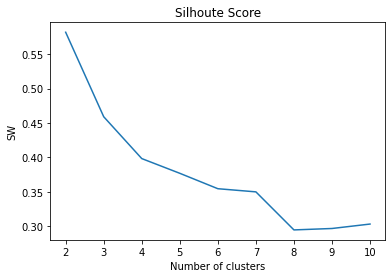

In [ ]:
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      
plt.show()

Finding Purity Score

In [ ]:
def purity_score(y_true, y_pred):

    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(x_scaled)
y_kmed = kmedoids.fit_predict(x_scaled)
purity_score(y,y_kmed)

0.84

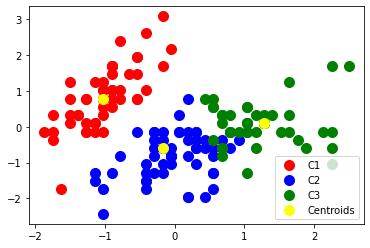

In [ ]:
plt.scatter(x_scaled[y_kmed == 0, 0], x_scaled[y_kmed == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x_scaled[y_kmed == 1, 0], x_scaled[y_kmed == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter(x_scaled[y_kmed == 2, 0], x_scaled[y_kmed == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

# Hierarchal Clustering

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Wholesale customers data.csv']))

## Data Normalization

In [ ]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

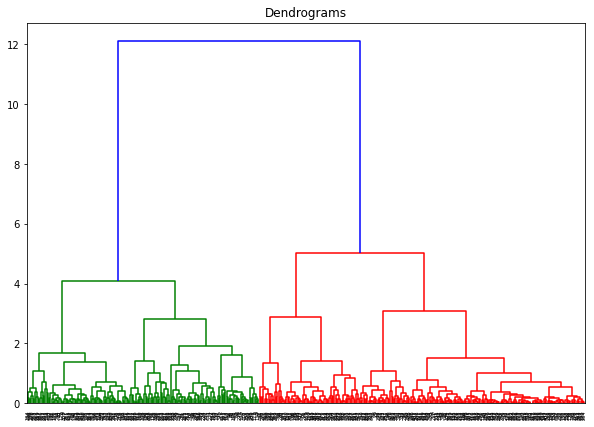

In [ ]:

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

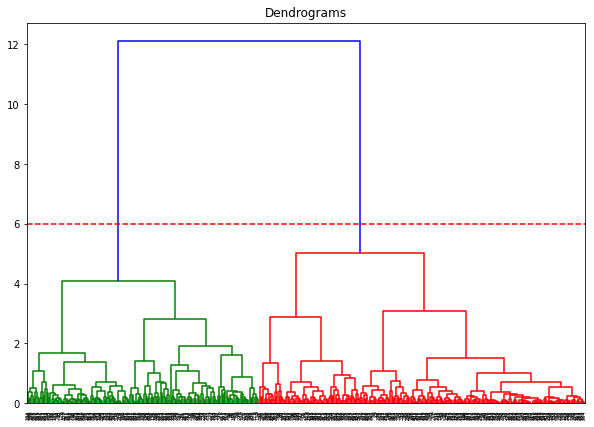

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

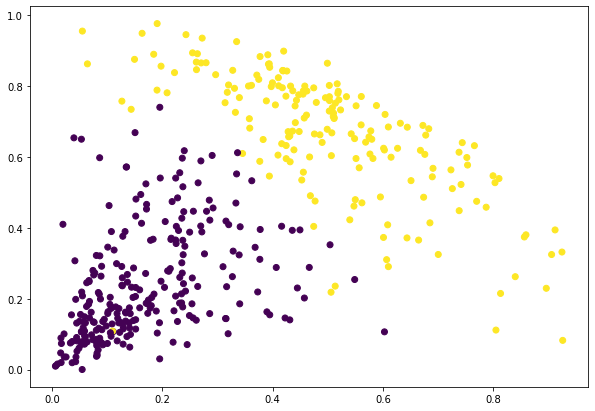

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 